# Reddit Data Analysis Project

This notebook will contain my basic analysis of the submissions and comments of a particular subreddit.  For this project the /r/edh subreddit was chosen since it's a subreddit I frequent and I was curious to see if there are any interesting inferences to be found from analyzing submissions and comments.

We start by importing the libraries used for working on and visualizing data.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient


The information is stored using MongoDB so the first thing to do will be trying to connect to the server.


In [5]:
try:
    client = MongoClient()
    db = client.redditdb_test
    submissions = db.submissions_test
    comments = db.comments_test
except MongoClient.errors.PyMongoError as e:
    print("Unspecified PyMongo Error")


Once that is successful we can set our options in pandas and construct the dataframes that will house the data we are analyzing.  We can also change the date time from a Unix Time Stamp(UTS) to a format that is more human usable.  After that we will add a new column containing the length of the comments.


In [6]:
# pd Options
pd.set_option('display.max_rows', 1000)

# Data Frames
df_sub = pd.DataFrame(list(submissions.find()))
df_com = pd.DataFrame(list(comments.find()))

# Make the dates readable
df_sub['time'] = df_sub['time'].astype(int)
df_com['time'] = df_com['time'].astype(int)

df_sub['time'] = pd.to_datetime(df_sub['time'], unit='s')
df_com['time'] = pd.to_datetime(df_com['time'], unit='s')

# Make a column cha_count for characters in body of post
cha_count_sub = [len(x) for x in df_sub['content']]
cha_count_com = [len(x) for x in df_com['content']]

df_sub['cha_count'] = cha_count_sub
df_com['cha_count'] = cha_count_com


Now we can print a the first 5 rows in the data frames df_sub and df_com.


In [7]:
print(df_sub.head(5))
print(df_com.head(5))

                        _id              author  \
0  5b22a405f597c41874eb1f51               waki4   
1  5b22a407f597c41874eb1f9e       Unmistakable1   
2  5b22a408f597c41874eb1fb2       MagicalHacker   
3  5b22a40af597c41874eb200e  SevenManaDoNothing   
4  5b22a40cf597c41874eb2051        Sir-Longhair   

                                             content   fullname subreddit  \
0  [EDHRECast: Solving “The Boros Problem”](http:...  t3_8r1zxn       EDH   
1  Hey guys! Unmistakable here,\n\nThis week, I w...  t3_8r2do6       EDH   
2  If someone asked you not to concede in a game ...  t3_8qz0ve       EDH   
3  Hey Everyone! Most of us have come across the ...  t3_8r162h       EDH   
4  I'm looking to build a new mono black deck, bu...  t3_8r208b       EDH   

                 time                                              title  \
0 2018-06-14 13:50:41             EDHRECast: Solving “The Boros Problem”   
1 2018-06-14 14:41:56  Tribal Unity - Zombies: A look into one of the...   
2 


Okay, so things are a bit ugly but easily noticed is that the amount of content in a post doesn't seem to correlate with up votes. There may be more things that aren't apparent that we will find as we mess with the data.  Next we can also describe the contents of the dataframe, the things we are looking at here will be author, upvotes, and comment length.


In [8]:
print(df_sub[['author']].describe())
print('-'*64)
print(df_sub[['up_votes']].describe())
print('-'*64)
print(df_sub[['cha_count']].describe())
print('-'*64)
print(df_com[['author']].describe())
print('-'*64)
print(df_com[['up_votes']].describe())
print('-'*64)
print(df_com[['cha_count']].describe())

                author
count              880
unique             674
top     Shatterpoint99
freq                12
----------------------------------------------------------------
         up_votes
count  880.000000
mean    18.402273
std     36.234786
min      0.000000
25%      3.000000
50%      6.000000
75%     15.000000
max    305.000000
----------------------------------------------------------------
          cha_count
count    880.000000
mean     972.380682
std     1297.165997
min        0.000000
25%      428.000000
50%      658.000000
75%     1019.750000
max    18368.000000
----------------------------------------------------------------
                author
count            28132
unique            4518
top     MTGCardFetcher
freq              6034
----------------------------------------------------------------
           up_votes
count  28132.000000
mean       3.729632
std       11.453246
min      -42.000000
25%        1.000000
50%        1.000000
75%        3.000000
max     


Oh no, there is a bot with the most comments, that might mess with the data set and it accounts for over 20% of comments in the forum.  The next thing we want to find are the top users by comment or submission length, up votes, and ammount of comments and submissions. We will remove u/MTGCardFetcher from the data going forward and redo the description of author.


In [9]:
df_com = df_com.replace('MTGCardFetcher', np.nan).dropna()
print(df_com[['author']].describe())

          author
count      22098
unique      4517
top     elting44
freq         308


That seems to have cleared things up a bit now we can proceed without the bot messing with things.

In [10]:
sort_length_sub = df_sub.sort_values('cha_count', ascending=False)
sort_length_com = df_com.sort_values('cha_count', ascending=False)

sort_upvote_sub = df_sub.sort_values('up_votes', ascending=False)
sort_upvote_com = df_com.sort_values('up_votes', ascending=False)

print(sort_length_sub.head(8))
print('-'*64)
print(sort_length_com.head(8))
print('-'*64)
print(sort_upvote_sub.head(8))
print('-'*64)
print(sort_upvote_com.head(8))

                          _id          author  \
836  5b22a858f597c41874eb8c9e     DovaKroniid   
432  5b22a62af597c41874eb5787     DovaKroniid   
155  5b22a4cbf597c41874eb31bc     cromonolith   
329  5b22a5d9f597c41874eb4b31     TrojanZebra   
851  5b22a861f597c41874eb8d88         evan111   
282  5b22a57cf597c41874eb42be  MaskedThespian   
182  5b22a4ecf597c41874eb345b     Martin_Gary   
662  5b22a7b1f597c41874eb798e      pudgimelon   

                                               content   fullname subreddit  \
836  Welcome, /r/EDH, to my next old set review! Th...  t3_8mlt4f       EDH   
432   \nWelcome, /r/EDH, to my final set review for...  t3_8optmf       EDH   
155  I'm sure there are many more. \n\nNote that al...  t3_8q7y1h       EDH   
329  # [Deck: Untitled Deck](https://deckstats.net/...  t3_8pib4m       EDH   
851  Let me start this post by saying that I've see...  t3_8mkkiz       EDH   
282  Hey, everyone.\n\nI've been working on this de...  t3_8pwdi3       EDH   
182  

There is more exploring to be done but from here we can see that by submission length our superusers are: DovaKoniid, cromonolith, TrojanZebra, evan111, MaskedThespian, Martin_Gary, pugimelon. 
By comment length the super users are: KurthagaLoL, thetracker3, Piekan, grummi92, aDubiousNotion, DrAlistairGrout, ASpicyStrawberry, GxMxG. 
For submission up votes our superusers are: Jayfeather69, nsolarz, twocents_, Zeathan, Stigna1, Maledicte, SilverLoonie, exoblaze.
For comment up votes our superusers are: Yuribarber, grimmbrother1, Equilorian, Whym81, nickoking, xemnas731, MissesDoubtfire, nevetz1911.

Just looking at the top 8 users for each category doesn't seem to yield much overlap which is interesting and supports the hypothesis that there is little correlation between the amount of content one posts and the up votes that user recieves

Now we will make graphs to help visualize the data.

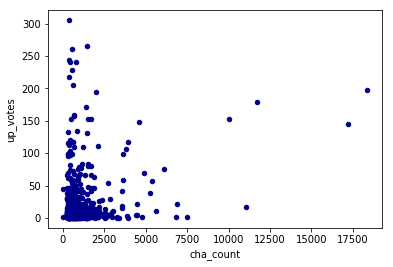

In [19]:
df_sub.plot.scatter(x='cha_count', y='up_votes', c='DarkBlue')
plt.show()

The graph above is a scatter plot graphing submission character count vs. the number of up votes.

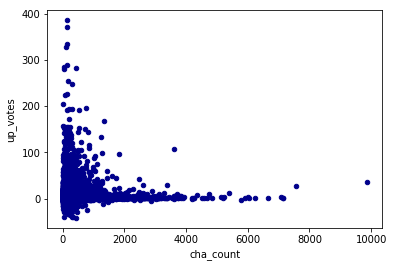

In [20]:
df_com.plot.scatter(x='cha_count', y='up_votes', c='DarkBlue')
plt.show()

The graph above is a scatter plot graphing comment character count vs. the number of up votes.